# <center> Taller Keras $-$ Ejemplo 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from time import time

from tensorflow.keras.models import Model, Sequential, load_model, save_model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import optimizers
from tensorflow.keras.utils import to_categorical

from pandas import DataFrame
from sklearn.metrics import confusion_matrix, classification_report
from plotmatrix import pretty_plot_confusion_matrix, PlotMatrix

import warnings
warnings.filterwarnings('ignore')

# Introducción a las Redes Neuronales (NNs)

__Objetivos:__
* Implementar una NN de varias capas en Keras para clasificar la base de datos MNIST.

In [2]:
# cargar la interfaz a la base de datos que viene con Keras
from tensorflow.keras.datasets import mnist

# lectura de los datos
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print('Raw data shapes:')
print('X train:', train_images.shape, 'Y train:', train_labels.shape)
print('X test:', test_images.shape, 'Y test:', test_labels.shape)

# pre-procesamiento de los datos
train_images = train_images.reshape((60000, -1))
train_images = train_images.astype('float32') / 255.

test_images = test_images.reshape((10000, -1))
test_images = test_images.astype('float32') / 255.

# one-hot encoding
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels  = to_categorical(test_labels)

Raw data shapes:
X train: (60000, 28, 28) Y train: (60000,)
X test: (10000, 28, 28) Y test: (10000,)


In [3]:
print('Modified data shapes:')
print('X train:', train_images.shape, 'Y train:', train_labels.shape)
print('X test:', test_images.shape, 'Y test:', test_labels.shape)

data_shape = train_images.shape[1:]

print('')
print('data shape:', data_shape)

Modified data shapes:
X train: (60000, 784) Y train: (60000, 10)
X test: (10000, 784) Y test: (10000, 10)

data shape: (784,)


In [4]:
test_labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

## Red neuronal multicapa

![](nn2.png)

__Ejercicio:__ Diseñe una red neuronal con 4 capas ocultas, más una capa de salida (como en la figura). Las capas deben ser densas. El número de neuronas en las capas debe ser: 512, 512, 256, 128, y 10 en la capa de salida.

Use funciones de activación ReLU (excepto en la capa de salida, donde se usará softmax). 


In [5]:
#Ejemplo de cómo definir una arquitectura sin usar "Sequential"

def NNmulticapa(input_shape):
    I = Input(shape=input_shape, name='input')
    X = Dense(16, activation='relu', name='dense1')(I)
    X = Dense(10, activation='softmax', name='classifier')(X)
    model = Model(I, X, name='NN-multicapa')
    return model

In [6]:
data_shape

(784,)

In [7]:
if 'network2' in globals(): del network2
network2 = None

network2 = NNmulticapa(data_shape)

In [8]:
network2.summary()

Model: "NN-multicapa"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 784)]             0         
                                                                 
 dense1 (Dense)              (None, 16)                12560     
                                                                 
 classifier (Dense)          (None, 10)                170       
                                                                 
Total params: 12,730
Trainable params: 12,730
Non-trainable params: 0
_________________________________________________________________


__Ejercicio:__ Compile y entrene la red neuronal de 2 capas.

Utilice el optimizador 'RMSprop', usted elige el learning rate apropiado. Use la función de pérdida 'categorical_crossentropy', y use como métrica el 'accuracy'.

Para el entrenamiento, use 15 épocas (iteraciones), un tamaño de batch de 64 ó 128, y haga una partición de validación de 0.16666 (5/6).

### Compile

In [9]:
alpha = 1e-10
opt = optimizers.RMSprop(lr=alpha)

network2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

### Train

In [10]:
tic = time()
history2 = network2.fit(x=train_images, y=train_labels, epochs=15, batch_size=64, validation_split=0.1666)
toc = time()
print('total training time:', toc-tic, 'seconds')

Epoch 1/15
782/782 [==============================] - 6s 6ms/step - loss: 0.5014 - accuracy: 0.8650 - val_loss: 0.2861 - val_accuracy: 0.9170
Epoch 2/15
782/782 [==============================] - 4s 5ms/step - loss: 0.2818 - accuracy: 0.9195 - val_loss: 0.2443 - val_accuracy: 0.9304
Epoch 3/15
782/782 [==============================] - 4s 5ms/step - loss: 0.2457 - accuracy: 0.9307 - val_loss: 0.2213 - val_accuracy: 0.9396
Epoch 4/15
782/782 [==============================] - 4s 5ms/step - loss: 0.2240 - accuracy: 0.9369 - val_loss: 0.2112 - val_accuracy: 0.9404
Epoch 5/15
782/782 [==============================] - 5s 6ms/step - loss: 0.2094 - accuracy: 0.9411 - val_loss: 0.2038 - val_accuracy: 0.9463
Epoch 6/15
782/782 [==============================] - 4s 5ms/step - loss: 0.1975 - accuracy: 0.9450 - val_loss: 0.1909 - val_accuracy: 0.9478
Epoch 7/15
782/782 [==============================] - 4s 5ms/step - loss: 0.1876 - accuracy: 0.9472 - val_loss: 0.1898 - val_accuracy: 0.9476
Epoch 

### Ver el historial de desempeño de la red

In [11]:
history_dict = history2.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

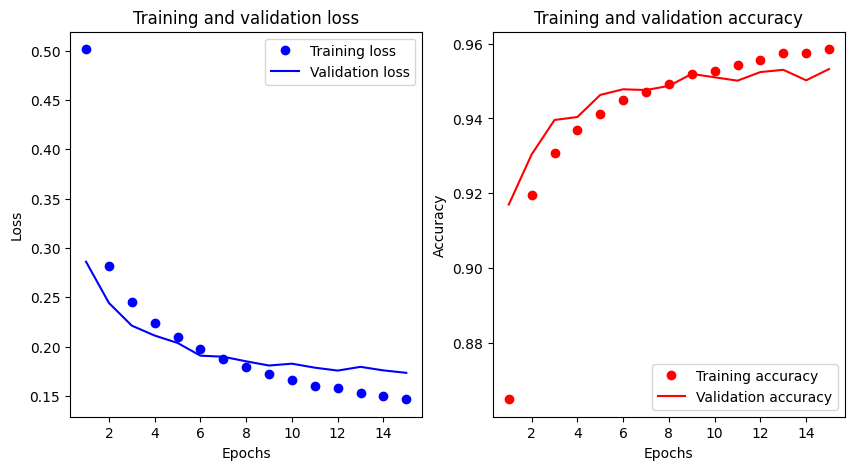

In [12]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(1, len(acc)+1)

# figure
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(epochs, acc, 'ro', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Resultados

In [ ]:
#results2 = network2.evaluate(test_images, test_labels)
#print('results loss:', results2[0])
#print('results accuracy:', results2[1])

In [13]:
# compute predictions (inference process)
predictions2 = network2.predict(test_images)

# from predictions compute most probable class
pred2 = np.argmax(predictions2, 1)
test_labs = np.argmax(test_labels, 1)

313/313 [==============================] - 1s 3ms/step


In [14]:
print(classification_report(test_labs, pred2))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.99      0.97      0.98      1135
           2       0.96      0.94      0.95      1032
           3       0.96      0.94      0.95      1010
           4       0.95      0.95      0.95       982
           5       0.93      0.93      0.93       892
           6       0.96      0.96      0.96       958
           7       0.95      0.95      0.95      1028
           8       0.90      0.95      0.93       974
           9       0.94      0.93      0.94      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



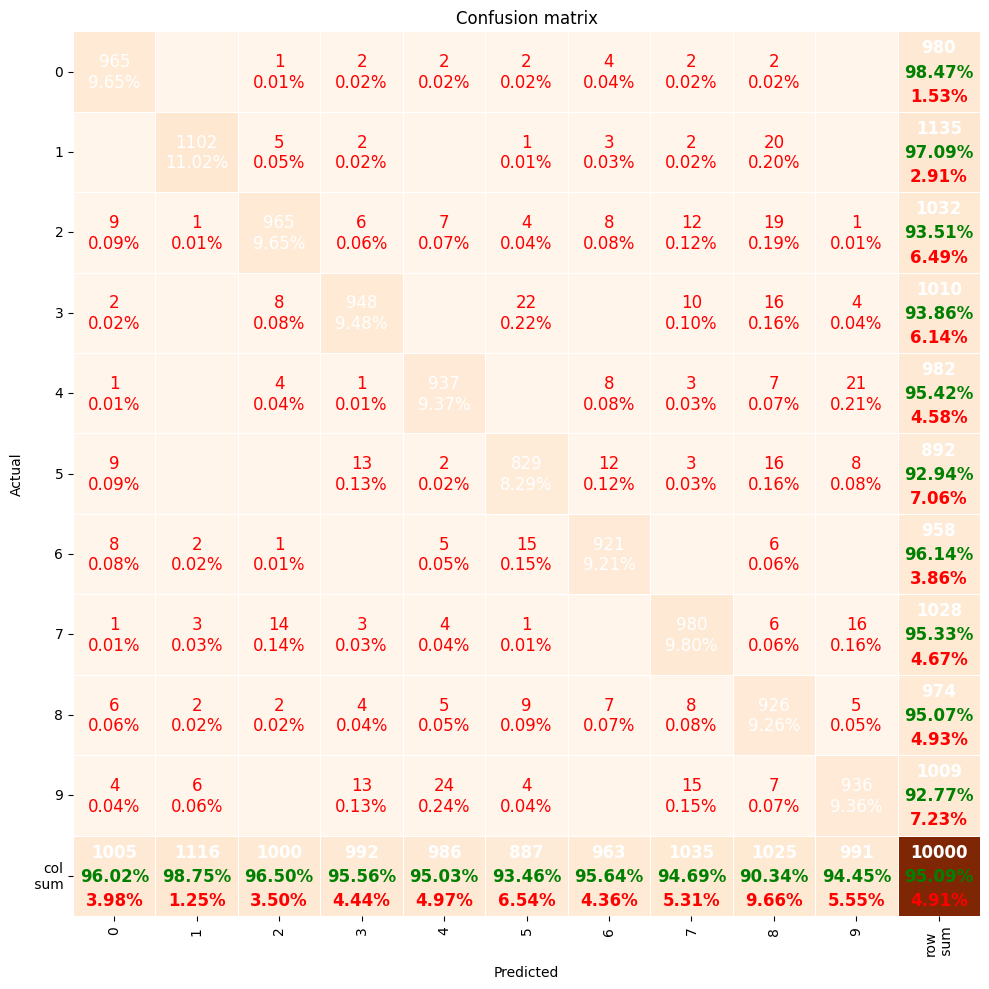

In [15]:
CM2 = confusion_matrix(test_labs, pred2)

# plot confusion matrix
cf2 = DataFrame(CM2)
pretty_plot_confusion_matrix(cf2, annot=True, pred_val_axis='x', figsize=(10,10), fz=12)

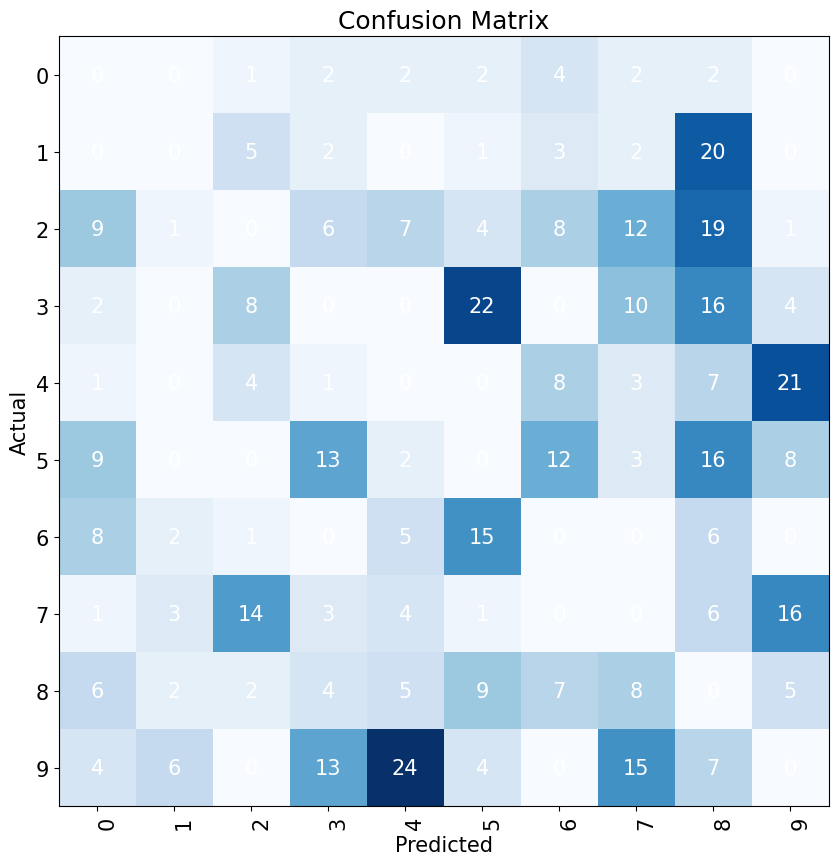

In [17]:
# second plot
PlotMatrix(CM2, figsize=(10,10), cmap=plt.cm.Blues, title='Confusion Matrix', fz=15)

---

---

### Ejercicio 1

* Implementar una arquitectura de red multicapa con 2 capas intermedias (más la capa clasificadora).

* Usar las funciones de activación que usted desee. En la capa clasificadora, usar 'softmax'.

* Elegir los parámetros a su discreción: optimizador, tamaño de paso (*learning rate*), número de épocas, ...

* Mostrar los resultados del desempeño en entrenamiento y prueba. El objetivo es diseñar una red que tenga un mejor desempeño que la de la clase pasasa.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from time import time

from tensorflow.keras.models import Model, Sequential, load_model, save_model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import optimizers
from tensorflow.keras.utils import to_categorical

from pandas import DataFrame
from sklearn.metrics import confusion_matrix, classification_report
from plotmatrix import pretty_plot_confusion_matrix, PlotMatrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
# cargar la interfaz a la base de datos que viene con Keras
from tensorflow.keras.datasets import mnist

# lectura de los datos
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print('Raw data shapes:')
print('X train:', train_images.shape, 'Y train:', train_labels.shape)
print('X test:', test_images.shape, 'Y test:', test_labels.shape)

# pre-procesamiento de los datos
train_images = train_images.reshape((60000, -1))
train_images = train_images.astype('float32') / 255.

test_images = test_images.reshape((10000, -1))
test_images = test_images.astype('float32') / 255.

# one-hot encoding
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels  = to_categorical(test_labels)

Raw data shapes:
X train: (60000, 28, 28) Y train: (60000,)
X test: (10000, 28, 28) Y test: (10000,)


In [3]:
print('Modified data shapes:')
print('X train:', train_images.shape, 'Y train:', train_labels.shape)
print('X test:', test_images.shape, 'Y test:', test_labels.shape)

data_shape = train_images.shape[1:]

print('')
print('data shape:', data_shape)

Modified data shapes:
X train: (60000, 784) Y train: (60000, 10)
X test: (10000, 784) Y test: (10000, 10)

data shape: (784,)


In [4]:
def NNmulticapa2(input_shape):
    I = Input(shape=input_shape, name='input')
    X = Dense(32, activation='relu', name='dense1')(I)
    X = Dense(16, activation='relu', name='dense2')(I)
    X = Dense(10, activation='softmax', name='classifier')(X)
    model = Model(I, X, name='NN-multicapa')
    return model

In [5]:
if 'network3' in globals(): del network3
network3 = None

network3 = NNmulticapa2(data_shape)

In [6]:
network3.summary()

Model: "NN-multicapa"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 784)]             0         
                                                                 
 dense2 (Dense)              (None, 16)                12560     
                                                                 
 classifier (Dense)          (None, 10)                170       
                                                                 
Total params: 12,730
Trainable params: 12,730
Non-trainable params: 0
_________________________________________________________________


In [7]:
alpha = 1e-15
opt = optimizers.Adam(lr=alpha)

network3.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
tic = time()
history3 = network3.fit(x=train_images, y=train_labels, epochs=15, batch_size=64, validation_split=0.1666)
toc = time()
print('total training time:', toc-tic, 'seconds')

Epoch 1/15
782/782 [==============================] - 4s 3ms/step - loss: 0.6050 - accuracy: 0.8337 - val_loss: 0.3037 - val_accuracy: 0.9168
Epoch 2/15
782/782 [==============================] - 2s 3ms/step - loss: 0.3060 - accuracy: 0.9127 - val_loss: 0.2684 - val_accuracy: 0.9266
Epoch 3/15
782/782 [==============================] - 2s 3ms/step - loss: 0.2724 - accuracy: 0.9214 - val_loss: 0.2491 - val_accuracy: 0.9308
Epoch 4/15
782/782 [==============================] - 2s 3ms/step - loss: 0.2513 - accuracy: 0.9287 - val_loss: 0.2332 - val_accuracy: 0.9352
Epoch 5/15
782/782 [==============================] - 2s 3ms/step - loss: 0.2311 - accuracy: 0.9339 - val_loss: 0.2133 - val_accuracy: 0.9396
Epoch 6/15
782/782 [==============================] - 2s 3ms/step - loss: 0.2151 - accuracy: 0.9378 - val_loss: 0.2059 - val_accuracy: 0.9420
Epoch 7/15
782/782 [==============================] - 2s 3ms/step - loss: 0.2050 - accuracy: 0.9406 - val_loss: 0.2005 - val_accuracy: 0.9428
Epoch 

In [9]:
history_dict = history3.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

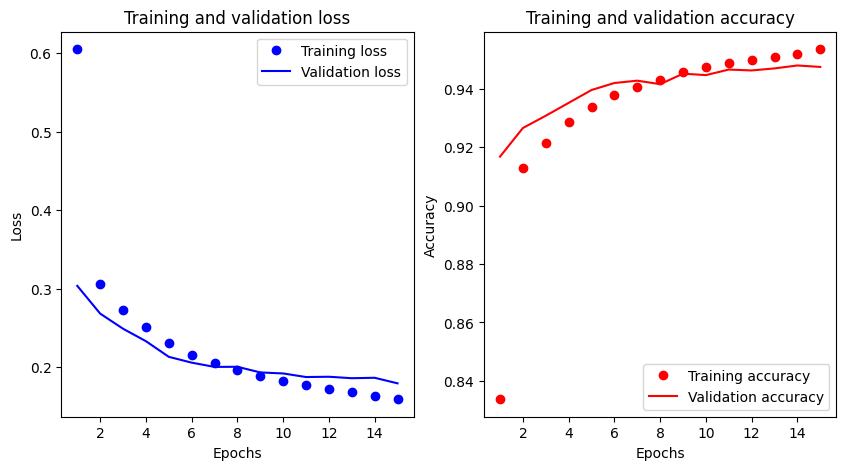

In [10]:
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']
loss = history3.history['loss']
val_loss = history3.history['val_loss']

epochs = range(1, len(acc)+1)

# figure
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(epochs, acc, 'ro', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [11]:
# compute predictions (inference process)
predictions3 = network3.predict(test_images)

# from predictions compute most probable class
pred3 = np.argmax(predictions3, 1)
test_labs = np.argmax(test_labels, 1)

313/313 [==============================] - 1s 2ms/step


In [12]:
print(classification_report(test_labs, pred3))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       980
           1       0.97      0.99      0.98      1135
           2       0.94      0.96      0.95      1032
           3       0.95      0.91      0.93      1010
           4       0.94      0.96      0.95       982
           5       0.92      0.93      0.93       892
           6       0.95      0.95      0.95       958
           7       0.96      0.94      0.95      1028
           8       0.92      0.92      0.92       974
           9       0.93      0.93      0.93      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



### Ejercicio 2

* Con la red del ejercicio anterior, experimentar usando diferentes clasificadores, para encontrar aquel que mejora el desempeño de su red.

* Experimente cambiando también otros parámetros: alpha, número de epochs, batch_size.

### Ejercicio 3

* Implementar una arquitectura de red multicapa con 4 capas intermedias (más la capa clasificadora).

* Usar las funciones de activación que usted desee. En la capa clasificadora, usar 'softmax'.

* Elegir los parámetros a su discreción: optimizador, tamaño de paso (*learning rate*), número de épocas, ...

* Mostrar los resultados del desempeño en entrenamiento y prueba. El objetivo es diseñar una red que tenga un mejor desempeño que el Ejercicio 1.